In [1]:
import wandb
from tqdm import tqdm
import pandas as pd
import pickle
api = wandb.Api(timeout=100)



In [2]:
import json
import os
import sys
sys.path.append('/home/yhc/projects/dcd')

from envs.iphyre.adversarial import load_vlm_gen_tasks_solvable


task_suite_path = {
    # "Iphyre-HandDesign-v0": "../../iphyre/test_toy20250110/20250525/output_hand_test",
    "Iphyre-ProceduralShift-v0": "../../../iphyre/test_toy20250110/20250602/output_eval_shift",
    "Iphyre-ProceduralRotate-v0": "../../../iphyre/test_toy20250110/20250602/output_eval_rotate",
    # "Iphyre-VLMGeneratedShift-v0": "../../iphyre/test_toy20250110/20250427/output_shift",
    # "Iphyre-VLMGeneratedRotate-v0": "../../iphyre/test_toy20250110/20250427/output_rotate",
}

metrics = []

suite_metrics = {}

bad_suite_metrics = {}

for suite_name, suit_path in task_suite_path.items():
    env_names, task_dict = load_vlm_gen_tasks_solvable(
        task_dir_list=[suit_path],
        should_check_solvable=True if 'VLM' in suite_name or 'Procedural' in suite_name else False
    )

    count = 0
    for env_name in env_names:
        # print(task_dict[env_name])

        full_env_name = f'{suite_name}/{env_name}/success_rate'
        metrics.append(full_env_name)
        if suite_name not in suite_metrics:
            suite_metrics[suite_name] = []
        suite_metrics[suite_name].append(full_env_name)
        count += 1
    print(f'{suite_name} has {count} envs')

    metrics.append(f'{suite_name}/mean_success_rate')

    env_names, task_dict = load_vlm_gen_tasks_solvable(
        task_dir_list=[suit_path],
        should_check_solvable=False
    )

    bad_suite_metrics[suite_name] = env_names
    print(f'BAD {suite_name} has {len(env_names)} envs')


raw_data = {metric: {} for metric in metrics}

print(metrics)

pygame 2.6.1 (SDL 2.28.4, Python 3.8.20)
Hello from the pygame community. https://www.pygame.org/contribute.html
Generated task used count: 100
Iphyre-ProceduralShift-v0 has 100 envs
Generated task used count: 100
BAD Iphyre-ProceduralShift-v0 has 100 envs
Generated task used count: 100
Iphyre-ProceduralRotate-v0 has 100 envs
Generated task used count: 100
BAD Iphyre-ProceduralRotate-v0 has 100 envs
['Iphyre-ProceduralShift-v0/20250602_231139_game_20/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_24/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_22/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_118/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_99/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_49/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_44/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_62/success_rate', 'Iphyre-ProceduralShift-v0/20250602_231139_game_76/success_rate', '

/home/yhc/miniconda3/envs/dred/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
import datetime
print(f"Fetching data...")
runs = api.runs(
    path="yqkqknct/dcd", 
    filters={"config.exp_name": {"$in": ["ued_iphyre_finetune", "test"]}}
)
print(f"Found {len(runs)} runs")

# Create directory for run data if it doesn't exist
os.makedirs("run_data", exist_ok=True)

# Process each run
for run in tqdm(runs):
    run_id = run.id
    method = run.config.get('method')

    run_file = f"run_data/{method}-{run_id}.pkl"

    if not method.startswith('Iphyre-ProceduralRotate-on-') and not method.startswith('Iphyre-ProceduralShift-'):
        print(f"Skipping {run.name}, not a procedural task")
        continue

    if run.config.get('exp_name') == 'test' and 'PLR' not in method:
        print(f"Skipping {run.name}, not a PLR task")
        continue

    print(run.created_at)

    if run.state == 'failed':
        print(f"Skipping {run.name}, failed")
        continue

    if run.created_at < "2025-06-26T15:55:57Z":
        print(f"Skipping {run.name}, created before 2025-06-27")
        continue
    
    # Skip if run data already exists
    # if os.path.exists(run_file):
    #     print(f"Skipping {run_id}, already processed")
    #     continue
        
    print(f"Processing {run_id}")
    print(f"Run state: {run.state}")
    print(f"Run name: {run.name}")
    print(f"Run method: {method}")
    
    # Get run data

    run_data = {
        'name': run.name,
        'method': method,
        'metrics': {}
    }
    # print(['global_step', *metrics])
    # Get history for each metric
    history = run.history(keys=['global_step', *metrics])
    # print(history)
    for m in metrics:
        run_data['metrics'][m] = history[['global_step', m]]
        
    # Save run data
    with open(run_file, 'wb') as f:
        pickle.dump(run_data, f)

        

Fetching data...
Found 160 runs


  0%|          | 0/160 [00:00<?, ?it/s]

Skipping ued-BipedalWalker-Adversarial-v0-domain_randomization-noexpgrad-lr0.0003-epoch5-mb32-v0.5-gc0.5-henv0.01-ha0.001-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0, not a procedural task
Skipping ued-BipedalWalker-Adversarial-v0-domain_randomization-noexpgrad-lr0.0003-epoch5-mb32-v0.5-gc0.5-henv0.01-ha0.001-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0, not a procedural task
Skipping ued-BipedalWalker-Adversarial-v0-domain_randomization-noexpgrad-lr0.0003-epoch5-mb32-v0.5-gc0.5-henv0.01-ha0.001-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0, not a procedural task
Skipping ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0, not a procedural task
Skipping ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0, not a procedural task
Skipping ued--domain_rando

 32%|███▏      | 51/160 [00:09<00:21,  5.14it/s]

Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250621-114709_789, not a procedural task
Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250621-114742_481, not a procedural task
Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250621-114852_901, not a procedural task
Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250621-114948_191, not a procedural task
Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250621-115117_914, not a procedural task
Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250621-115353_778, not a procedural task
Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250621-115632_597, not a procedural task
Skipping ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01

 54%|█████▍    | 86/160 [00:10<00:08,  9.10it/s]

2025-06-27T13:37:05Z
Processing c9bgjf5i
Run state: finished
Run name: Iphyre-ProceduralRotate-on-DR_20250627-213701_586
Run method: Iphyre-ProceduralRotate-on-DR
2025-06-27T13:38:08Z
Processing 7halvg0q
Run state: finished
Run name: Iphyre-ProceduralRotate-on-PLR_20250627-213805_689
Run method: Iphyre-ProceduralRotate-on-PLR
2025-06-27T13:38:08Z
Processing obud9zsg
Run state: finished
Run name: Iphyre-ProceduralRotate-on-PLR_20250627-213805_509
Run method: Iphyre-ProceduralRotate-on-PLR


 56%|█████▌    | 89/160 [00:13<00:10,  6.74it/s]

2025-06-27T13:38:09Z
Processing wjca85s9
Run state: finished
Run name: Iphyre-ProceduralRotate-on-PLR_20250627-213805_900
Run method: Iphyre-ProceduralRotate-on-PLR
2025-06-27T13:39:36Z
Processing 4b41y32v
Run state: finished
Run name: Iphyre-ProceduralRotate-on-Accel_20250627-213934_719
Run method: Iphyre-ProceduralRotate-on-Accel


 57%|█████▋    | 91/160 [00:14<00:12,  5.49it/s]

2025-06-27T13:39:37Z
Processing 8jnignxi
Run state: finished
Run name: Iphyre-ProceduralRotate-on-Accel_20250627-213934_859
Run method: Iphyre-ProceduralRotate-on-Accel


 57%|█████▊    | 92/160 [00:15<00:14,  4.84it/s]

2025-06-27T13:39:37Z
Processing e83warhs
Run state: finished
Run name: Iphyre-ProceduralRotate-on-Accel_20250627-213934_834
Run method: Iphyre-ProceduralRotate-on-Accel


 58%|█████▊    | 93/160 [00:16<00:16,  4.19it/s]

2025-06-27T13:42:11Z
Processing d98rl5fv
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VUniform_20250627-214208_308
Run method: Iphyre-ProceduralRotate-on-VUniform


 59%|█████▉    | 94/160 [00:17<00:18,  3.58it/s]

2025-06-27T13:42:11Z
Processing ffa6p0bh
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VUniform_20250627-214209_787
Run method: Iphyre-ProceduralRotate-on-VUniform


 59%|█████▉    | 95/160 [00:18<00:21,  3.05it/s]

2025-06-27T13:42:11Z
Processing klj8unud
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VUniform_20250627-214208_752
Run method: Iphyre-ProceduralRotate-on-VUniform


 60%|██████    | 96/160 [00:18<00:23,  2.67it/s]

2025-06-27T13:47:56Z
Processing 40qy0u5s
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL_20250627-214753_885
Run method: Iphyre-ProceduralRotate-on-VSFL


 61%|██████    | 97/160 [00:19<00:27,  2.27it/s]

2025-06-27T13:47:56Z
Processing qht8gauf
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL_20250627-214753_280
Run method: Iphyre-ProceduralRotate-on-VSFL


 61%|██████▏   | 98/160 [00:20<00:30,  2.02it/s]

2025-06-27T13:47:56Z
Processing snxsy0ds
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL_20250627-214753_746
Run method: Iphyre-ProceduralRotate-on-VSFL


 62%|██████▏   | 99/160 [00:21<00:34,  1.77it/s]

2025-06-27T13:48:48Z
Processing d201ufgr
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VPLR_20250627-214846_344
Run method: Iphyre-ProceduralRotate-on-VPLR


 62%|██████▎   | 100/160 [00:22<00:36,  1.63it/s]

2025-06-27T13:48:48Z
Processing f1qy60mx
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VPLR_20250627-214846_624
Run method: Iphyre-ProceduralRotate-on-VPLR


 63%|██████▎   | 101/160 [00:33<02:56,  2.99s/it]

2025-06-27T13:48:48Z
Processing iexiqi5q
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VPLR_20250627-214845_709
Run method: Iphyre-ProceduralRotate-on-VPLR


 64%|██████▍   | 102/160 [00:33<02:22,  2.46s/it]

2025-06-27T13:49:31Z
Processing f17ozldb
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VAccel_20250627-214929_275
Run method: Iphyre-ProceduralRotate-on-VAccel


 64%|██████▍   | 103/160 [00:34<01:55,  2.03s/it]

2025-06-27T13:49:31Z
Processing qz7cxr2z
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VAccel_20250627-214929_426
Run method: Iphyre-ProceduralRotate-on-VAccel


 65%|██████▌   | 104/160 [00:35<01:33,  1.68s/it]

2025-06-28T01:43:01Z
Processing 9ofvnbvo
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VAccel_20250628-094259_894
Run method: Iphyre-ProceduralRotate-on-VAccel


 66%|██████▌   | 105/160 [00:36<01:19,  1.44s/it]

2025-06-28T01:43:23Z
Processing owcj6xu4
Run state: finished
Run name: Iphyre-ProceduralRotate-on-DR_20250628-094320_381
Run method: Iphyre-ProceduralRotate-on-DR


 66%|██████▋   | 106/160 [00:37<01:07,  1.25s/it]

2025-06-28T03:27:58Z
Processing bzufg7cj
Run state: finished
Run name: Iphyre-ProceduralShift-on-DR_20250628-112755_14
Run method: Iphyre-ProceduralShift-on-DR


 67%|██████▋   | 107/160 [00:37<00:59,  1.11s/it]

2025-06-28T03:27:58Z
Processing sst2iuo2
Run state: finished
Run name: Iphyre-ProceduralShift-on-DR_20250628-112755_543
Run method: Iphyre-ProceduralShift-on-DR


 68%|██████▊   | 108/160 [00:38<00:51,  1.01it/s]

2025-06-28T03:27:58Z
Processing wjqajn1h
Run state: finished
Run name: Iphyre-ProceduralShift-on-DR_20250628-112755_811
Run method: Iphyre-ProceduralShift-on-DR


 68%|██████▊   | 109/160 [00:39<00:48,  1.05it/s]

2025-06-28T03:29:01Z
Processing vtsm1wfa
Run state: finished
Run name: Iphyre-ProceduralShift-on-PLR_20250628-112859_886
Run method: Iphyre-ProceduralShift-on-PLR


 69%|██████▉   | 110/160 [00:40<00:45,  1.10it/s]

2025-06-28T03:29:01Z
Processing xwrdciyg
Run state: finished
Run name: Iphyre-ProceduralShift-on-PLR_20250628-112859_120
Run method: Iphyre-ProceduralShift-on-PLR


 69%|██████▉   | 111/160 [00:41<00:41,  1.17it/s]

2025-06-28T03:29:01Z
Processing y1mzf7iz
Run state: finished
Run name: Iphyre-ProceduralShift-on-PLR_20250628-112859_726
Run method: Iphyre-ProceduralShift-on-PLR


 70%|███████   | 112/160 [00:41<00:38,  1.24it/s]

2025-06-28T03:31:13Z
Processing 0gp51jln
Run state: finished
Run name: Iphyre-ProceduralShift-on-Accel_20250628-113110_584
Run method: Iphyre-ProceduralShift-on-Accel


 71%|███████   | 113/160 [00:42<00:36,  1.30it/s]

2025-06-28T03:31:13Z
Processing i1otde9c
Run state: finished
Run name: Iphyre-ProceduralShift-on-Accel_20250628-113110_433
Run method: Iphyre-ProceduralShift-on-Accel


 71%|███████▏  | 114/160 [00:43<00:34,  1.33it/s]

2025-06-28T03:31:13Z
Processing kt6rags8
Run state: finished
Run name: Iphyre-ProceduralShift-on-Accel_20250628-113111_374
Run method: Iphyre-ProceduralShift-on-Accel


 72%|███████▏  | 115/160 [00:43<00:33,  1.32it/s]

2025-06-28T03:34:16Z
Processing 5mb7q01w
Run state: finished
Run name: Iphyre-ProceduralShift-on-VPLR_20250628-033415_81
Run method: Iphyre-ProceduralShift-on-VPLR


 72%|███████▎  | 116/160 [00:44<00:31,  1.38it/s]

2025-06-28T03:34:16Z
Processing fjc48ja6
Run state: finished
Run name: Iphyre-ProceduralShift-on-VPLR_20250628-033415_158
Run method: Iphyre-ProceduralShift-on-VPLR


 73%|███████▎  | 117/160 [00:45<00:31,  1.37it/s]

2025-06-28T03:34:16Z
Processing fo6yh2k9
Run state: finished
Run name: Iphyre-ProceduralShift-on-VPLR_20250628-033415_259
Run method: Iphyre-ProceduralShift-on-VPLR


 74%|███████▍  | 118/160 [00:46<00:31,  1.34it/s]

2025-06-28T03:34:53Z
Processing 2ihd7e68
Run state: finished
Run name: Iphyre-ProceduralShift-on-VAccel_20250628-033452_712
Run method: Iphyre-ProceduralShift-on-VAccel


 74%|███████▍  | 119/160 [00:46<00:30,  1.34it/s]

2025-06-28T03:34:53Z
Processing i96vl2hv
Run state: finished
Run name: Iphyre-ProceduralShift-on-VAccel_20250628-033452_354
Run method: Iphyre-ProceduralShift-on-VAccel


 75%|███████▌  | 120/160 [00:47<00:28,  1.38it/s]

2025-06-28T03:34:53Z
Processing iz5oznue
Run state: finished
Run name: Iphyre-ProceduralShift-on-VAccel_20250628-033452_436
Run method: Iphyre-ProceduralShift-on-VAccel


 76%|███████▌  | 121/160 [00:48<00:28,  1.35it/s]

2025-06-28T03:35:45Z
Processing 6pyjn6ag
Run state: finished
Run name: Iphyre-ProceduralShift-on-VSFL_20250628-033543_555
Run method: Iphyre-ProceduralShift-on-VSFL


 76%|███████▋  | 122/160 [00:49<00:28,  1.32it/s]

2025-06-28T03:35:45Z
Processing dz5nweux
Run state: finished
Run name: Iphyre-ProceduralShift-on-VSFL_20250628-033543_485
Run method: Iphyre-ProceduralShift-on-VSFL


 77%|███████▋  | 123/160 [00:49<00:27,  1.32it/s]

2025-06-28T03:35:45Z
Processing gnrzah4x
Run state: finished
Run name: Iphyre-ProceduralShift-on-VSFL_20250628-033543_509
Run method: Iphyre-ProceduralShift-on-VSFL


 78%|███████▊  | 124/160 [00:50<00:27,  1.29it/s]

2025-06-28T03:37:58Z
Processing 3soasxpd
Run state: finished
Run name: Iphyre-ProceduralShift-on-VUniform_20250628-033756_501
Run method: Iphyre-ProceduralShift-on-VUniform


 78%|███████▊  | 125/160 [00:51<00:27,  1.26it/s]

2025-06-28T03:37:58Z
Processing 5kpvu2d2
Run state: finished
Run name: Iphyre-ProceduralShift-on-VUniform_20250628-033756_723
Run method: Iphyre-ProceduralShift-on-VUniform


 79%|███████▉  | 126/160 [00:52<00:26,  1.29it/s]

2025-06-28T03:37:58Z
Processing ek9agkx7
Run state: finished
Run name: Iphyre-ProceduralShift-on-VUniform_20250628-033756_953
Run method: Iphyre-ProceduralShift-on-VUniform


 79%|███████▉  | 127/160 [00:52<00:24,  1.32it/s]

Skipping Iphyre-Single-Finetune-VUniform_20250628-120043_271, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-120132_563, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-120155_909, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-120233_285, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-120518_443, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-120603_82, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-120705_890, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-120854_386, not a procedural task
Skipping Iphyre-Single-Finetune-VUniform_20250628-122857_123, not a procedural task
2025-06-28T13:46:31Z
Processing 9pi6gtlc
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VPLR-VSFLcritic_20250628-214629_482
Run method: Iphyre-ProceduralRotate-on-VPLR-VSFLcritic


 86%|████████▌ | 137/160 [00:53<00:04,  4.74it/s]

2025-06-28T13:46:31Z
Processing w7fvr8wx
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VPLR-VSFLcritic_20250628-214629_400
Run method: Iphyre-ProceduralRotate-on-VPLR-VSFLcritic


 86%|████████▋ | 138/160 [00:54<00:06,  3.58it/s]

2025-06-28T13:46:31Z
Processing zxf2813w
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VPLR-VSFLcritic_20250628-214629_742
Run method: Iphyre-ProceduralRotate-on-VPLR-VSFLcritic


 87%|████████▋ | 139/160 [00:55<00:07,  2.84it/s]

2025-06-28T13:48:35Z
Processing 0rrdlena
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VAccel-VSFLcritic_20250628-214832_934
Run method: Iphyre-ProceduralRotate-on-VAccel-VSFLcritic


 88%|████████▊ | 140/160 [00:56<00:08,  2.33it/s]

2025-06-28T13:48:35Z
Processing jk8immke
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VAccel-VSFLcritic_20250628-214832_276
Run method: Iphyre-ProceduralRotate-on-VAccel-VSFLcritic


 88%|████████▊ | 141/160 [00:57<00:09,  2.02it/s]

2025-06-28T13:48:35Z
Processing ukf21ujf
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VAccel-VSFLcritic_20250628-214832_383
Run method: Iphyre-ProceduralRotate-on-VAccel-VSFLcritic


 89%|████████▉ | 142/160 [00:57<00:09,  1.84it/s]

2025-06-29T02:19:53Z
Processing p6757yq7
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-DRcritic_20250629-101950_466
Run method: Iphyre-ProceduralRotate-on-VSFL-DRcritic


 89%|████████▉ | 143/160 [00:58<00:09,  1.85it/s]

2025-06-29T02:19:53Z
Processing uz5cczvn
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-DRcritic_20250629-101950_62
Run method: Iphyre-ProceduralRotate-on-VSFL-DRcritic


 90%|█████████ | 144/160 [00:58<00:08,  1.88it/s]

2025-06-29T02:19:53Z
Processing vpw6v5wg
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-DRcritic_20250629-101950_293
Run method: Iphyre-ProceduralRotate-on-VSFL-DRcritic


 91%|█████████ | 145/160 [00:59<00:07,  1.91it/s]

2025-06-29T02:21:12Z
Processing 9fyteva0
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VAccelcritic_20250629-102110_282
Run method: Iphyre-ProceduralRotate-on-VSFL-VAccelcritic


 91%|█████████▏| 146/160 [00:59<00:07,  1.84it/s]

2025-06-29T02:21:12Z
Processing cao3si6w
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VAccelcritic_20250629-102110_344
Run method: Iphyre-ProceduralRotate-on-VSFL-VAccelcritic


 92%|█████████▏| 147/160 [01:00<00:07,  1.76it/s]

2025-06-29T02:21:13Z
Processing 4k1qgz92
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VAccelcritic_20250629-102110_914
Run method: Iphyre-ProceduralRotate-on-VSFL-VAccelcritic


 92%|█████████▎| 148/160 [01:01<00:07,  1.67it/s]

2025-06-29T02:23:14Z
Processing 9yeln4r5
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VPLRcritic_20250629-102311_393
Run method: Iphyre-ProceduralRotate-on-VSFL-VPLRcritic


 93%|█████████▎| 149/160 [01:01<00:06,  1.58it/s]

2025-06-29T02:23:14Z
Processing ke2bvbiw
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VPLRcritic_20250629-102311_234
Run method: Iphyre-ProceduralRotate-on-VSFL-VPLRcritic


 94%|█████████▍| 150/160 [01:02<00:06,  1.61it/s]

2025-06-29T02:23:14Z
Processing p76qklzb
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VPLRcritic_20250629-102311_27
Run method: Iphyre-ProceduralRotate-on-VSFL-VPLRcritic


 94%|█████████▍| 151/160 [01:05<00:11,  1.27s/it]

2025-06-29T02:24:04Z
Processing twfqjvph
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VUniformcritic_20250629-102401_574
Run method: Iphyre-ProceduralRotate-on-VSFL-VUniformcritic


 95%|█████████▌| 152/160 [01:05<00:08,  1.04s/it]

2025-06-29T02:24:05Z
Processing jxcto41d
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VUniformcritic_20250629-102402_757
Run method: Iphyre-ProceduralRotate-on-VSFL-VUniformcritic


 96%|█████████▌| 153/160 [01:06<00:06,  1.11it/s]

2025-06-29T02:24:05Z
Processing rm6e3dpm
Run state: finished
Run name: Iphyre-ProceduralRotate-on-VSFL-VUniformcritic_20250629-102402_84
Run method: Iphyre-ProceduralRotate-on-VSFL-VUniformcritic


 96%|█████████▋| 154/160 [01:07<00:04,  1.23it/s]

2025-06-29T02:52:18Z
Processing 8afzgvhg
Run state: finished
Run name: Iphyre-ProceduralShift-on-SFL_20250629-105216_902
Run method: Iphyre-ProceduralShift-on-SFL


 97%|█████████▋| 155/160 [01:07<00:03,  1.27it/s]

2025-06-29T02:52:18Z
Processing ytwbcn8b
Run state: finished
Run name: Iphyre-ProceduralShift-on-SFL_20250629-105216_458
Run method: Iphyre-ProceduralShift-on-SFL


 98%|█████████▊| 156/160 [01:08<00:03,  1.32it/s]

2025-06-29T02:52:19Z
Processing jk8t6yzz
Run state: finished
Run name: Iphyre-ProceduralShift-on-SFL_20250629-105216_395
Run method: Iphyre-ProceduralShift-on-SFL


 98%|█████████▊| 157/160 [01:09<00:02,  1.28it/s]

2025-06-29T02:53:15Z
Processing 6xripkos
Run state: finished
Run name: Iphyre-ProceduralRotate-on-SFL_20250629-105313_80
Run method: Iphyre-ProceduralRotate-on-SFL


 99%|█████████▉| 158/160 [01:09<00:01,  1.40it/s]

2025-06-29T02:53:15Z
Processing alxdwauo
Run state: finished
Run name: Iphyre-ProceduralRotate-on-SFL_20250629-105313_226
Run method: Iphyre-ProceduralRotate-on-SFL


 99%|█████████▉| 159/160 [01:10<00:00,  1.47it/s]

2025-06-29T02:53:15Z
Processing mqd4iu0c
Run state: finished
Run name: Iphyre-ProceduralRotate-on-SFL_20250629-105313_477
Run method: Iphyre-ProceduralRotate-on-SFL


100%|██████████| 160/160 [01:11<00:00,  2.25it/s]


In [4]:
import numpy as np
# Process all run data into method_dfs
method_dfs = {m: {} for m in metrics}

# Load and process all run files
for run_file in os.listdir("run_data"):
    with open(f"run_data/{run_file}", 'rb') as f:
        run_data = pickle.load(f)
        method = run_data['method']
        
        # Process each metric
        for m in metrics:
            if method not in method_dfs[m]:
                method_dfs[m][method] = []
            try:
                method_dfs[m][method].append(run_data['metrics'][m])
            except:
                print(f"Error processing {m} for {method} ")
            
# Calculate statistics for each method/metric
for m in metrics:
    for method, histories in method_dfs[m].items():
        # Concatenate histories from multiple runs
        print(f'method: {method} | histories: {len(histories)}')
        method_df = pd.concat(histories, axis=0)
        # Group by step and calculate statistics 
        grouped = method_df.groupby('global_step').agg({
            m: ['mean', 'min', 'max', 'std']
        })
        # Calculate standard error
        n = len(histories)
        grouped[(m,'stderr')] = grouped[(m,'std')] / (n ** 0.5)
        method_dfs[m][method] = grouped
        
    # Save processed data for each metric
    metric_processed_filename = f'processed_data_{m.split("/")[0]}.pkl'
    with open(metric_processed_filename, 'wb') as f:
        pickle.dump(method_dfs[m], f)

print("Data downloaded and processed for methods:", list(method_dfs[metrics[0]].keys()))


method: Iphyre-ProceduralRotate-on-VAccel-VSFLcritic | histories: 3
method: Iphyre-ProceduralShift-on-VSFL | histories: 3
method: Iphyre-ProceduralShift-on-SFL | histories: 3
method: Iphyre-ProceduralShift-on-VPLR | histories: 3
method: Iphyre-ProceduralRotate-on-VSFL | histories: 3
method: Iphyre-ProceduralShift-on-Accel | histories: 3
method: Iphyre-ProceduralShift-on-VUniform | histories: 3
method: Iphyre-ProceduralRotate-on-DR | histories: 3
method: Iphyre-ProceduralRotate-on-VUniform | histories: 3
method: Iphyre-ProceduralRotate-on-VAccel | histories: 3
method: Iphyre-ProceduralShift-on-DR | histories: 3
method: Iphyre-ProceduralRotate-on-VPLR-VSFLcritic | histories: 3
method: Iphyre-ProceduralRotate-on-VSFL-VPLRcritic | histories: 3
method: Iphyre-ProceduralRotate-on-VSFL-VAccelcritic | histories: 3
method: Iphyre-ProceduralRotate-on-VSFL-VUniformcritic | histories: 3
method: Iphyre-ProceduralRotate-on-Accel | histories: 3
method: Iphyre-ProceduralShift-on-PLR | histories: 3
met

In [50]:

# algorithms = ['Iphyre-DR', 'Iphyre-V-Uniform', 
#                'Iphyre-Robust-PLR', 'Iphyre-V-Robust-PLR', 
#                'Iphyre-Accel', 'Iphyre-V-Accel',
#                'Iphyre-V-SFL', ]

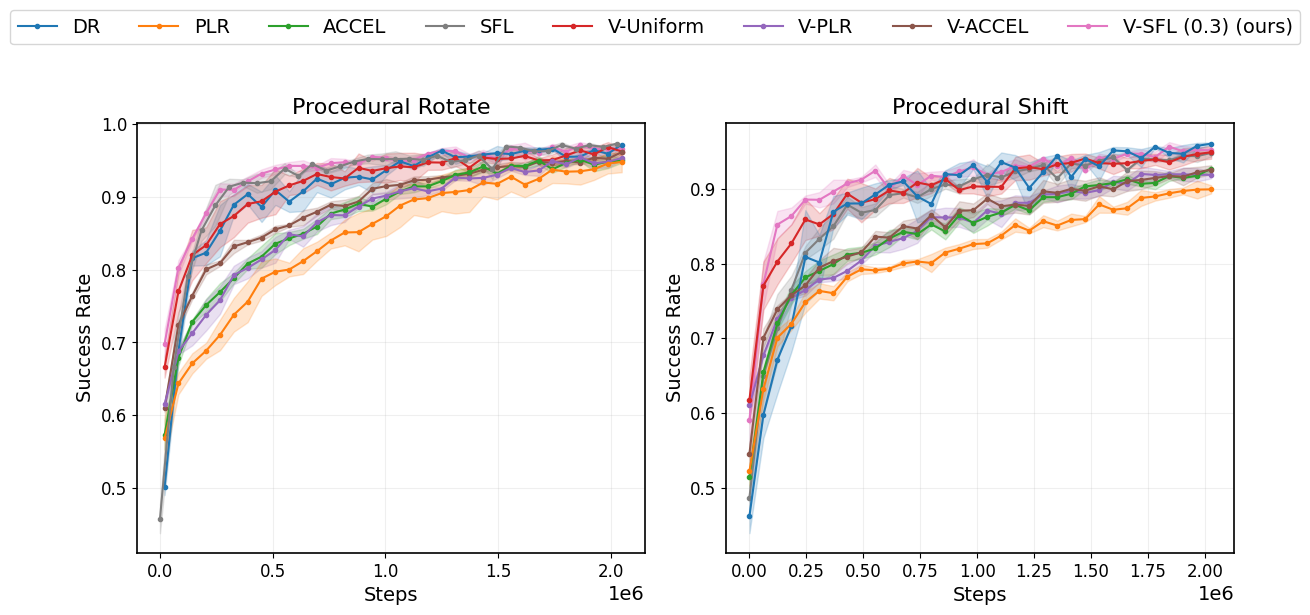

In [12]:

# algorithms = ['Iphyre-DR', 'Iphyre-V-Uniform', 
#                'Iphyre-Robust-PLR', 'Iphyre-V-Robust-PLR', 
#                'Iphyre-Accel', 'Iphyre-V-Accel',
#                'Iphyre-V-SFL', ]
import matplotlib.pyplot as plt

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']



method_display_config_rotate = {
    'Iphyre-ProceduralRotate-on-DR': {
        'color': default_colors[0],
        'marker': 'o',
        'markersize': 3,
        'label': 'DR',
    },
    'Iphyre-ProceduralRotate-on-PLR': {
        'color': default_colors[1],
        'marker': 'o',
        'markersize': 3,
        'label': 'PLR',
    },
    'Iphyre-ProceduralRotate-on-Accel': {
        'color': default_colors[2],
        'marker': 'o',
        'markersize': 3,
        'label': 'ACCEL',
    },
    'Iphyre-ProceduralRotate-on-SFL': {
        'color': default_colors[7],
        'marker': 'o',
        'markersize': 3,
        'label': 'SFL',
    },
    'Iphyre-ProceduralRotate-on-VUniform': {
        'color': default_colors[3],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-Uniform',
    },
    'Iphyre-ProceduralRotate-on-VPLR': {
        'color': default_colors[4],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-PLR',
    },
    'Iphyre-ProceduralRotate-on-VAccel': {
        'color': default_colors[5],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-ACCEL',
    },
    'Iphyre-ProceduralRotate-on-VSFL': {
        'color': default_colors[6],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-SFL (0.3) (ours)',
    },
}
methods_to_plot_rotate = method_display_config_rotate.keys()


method_display_config_shift = {
    'Iphyre-ProceduralShift-on-DR': {
        'color': default_colors[0],
        'marker': 'o',
        'markersize': 3,
        'label': 'DR',
    },
    'Iphyre-ProceduralShift-on-PLR': {
        'color': default_colors[1],
        'marker': 'o',
        'markersize': 3,
        'label': 'PLR',
    },
    'Iphyre-ProceduralShift-on-Accel': {
        'color': default_colors[2],
        'marker': 'o',
        'markersize': 3,
        'label': 'ACCEL',
    },
    'Iphyre-ProceduralShift-on-SFL': {
        'color': default_colors[7],
        'marker': 'o',
        'markersize': 3,
        'label': 'SFL',
    },
    'Iphyre-ProceduralShift-on-VUniform': {
        'color': default_colors[3],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-Uniform',
    },
    'Iphyre-ProceduralShift-on-VPLR': {
        'color': default_colors[4],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-PLR',
    },
    'Iphyre-ProceduralShift-on-VAccel': {
        'color': default_colors[5],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-ACCEL',
    },
    'Iphyre-ProceduralShift-on-VSFL': {
        'color': default_colors[6],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-SFL(0.3) (ours)',
    },
}
methods_to_plot_shift = method_display_config_shift.keys()

chart_metrics = [
    ("Iphyre-ProceduralRotate-v0/mean_success_rate", "Procedural Rotate"),
    ("Iphyre-ProceduralShift-v0/mean_success_rate", "Procedural Shift"),
]

filename = 'exp3-multitask.png'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure with gridspec
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1])
# Create axes
ax1 = plt.subplot(gs[0, 0:3])  # Span first three columns in top row
ax2 = plt.subplot(gs[0, 3:6])

plt.rcParams.update({'font.size': 14})  # Increase overall font size

gap = 3
end = 100

for method, df in method_dfs[chart_metrics[0][0]].items():
    if method in methods_to_plot_rotate:
        # Sample every 5th datapoint
        sampled_df = df.iloc[:end:gap]
        mean = sampled_df[(chart_metrics[0][0], 'mean')]
        stderr = sampled_df[(chart_metrics[0][0], 'stderr')]
        ax1.plot(sampled_df.index, mean, label=method_display_config_rotate[method]['label'], marker='o', markersize=3, color=method_display_config_rotate[method]['color'])
        ax1.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config_rotate[method]['color'])
ax1.set_xlabel('Steps', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.set_title(chart_metrics[0][1], fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='-', alpha=0.2)
# ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)
for spine in ax1.spines.values():
    spine.set_linewidth(1.2)



for method, df in method_dfs[chart_metrics[1][0]].items():
    if method in methods_to_plot_shift:
        # Sample every 5th datapoint
        sampled_df = df.iloc[:end:gap]
        mean = sampled_df[(chart_metrics[1][0], 'mean')]
        stderr = sampled_df[(chart_metrics[1][0], 'stderr')]
        ax2.plot(sampled_df.index, mean, label=method_display_config_shift[method]['label'], marker='o', markersize=3, color=method_display_config_shift[method]['color'])
        ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config_shift[method]['color'])
ax2.set_xlabel('Steps', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.set_title(chart_metrics[1][1], fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='-', alpha=0.2)
# ax2.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)
for spine in ax2.spines.values():
    spine.set_linewidth(1.2)



# Add legend at the top of the figure
handles, labels = ax1.get_legend_handles_labels()


# Add legend at the top of the figure
def find_index(array, condition):
    return next((i for i, x in enumerate(array) if condition(x)), -1)


sorted_pairs = sorted(zip(handles, labels), key=lambda x: find_index(method_display_config_rotate.items(), lambda y: y[1]['label'] == x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)

fig.legend(sorted_handles, sorted_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=14)

plt.tight_layout()
if filename:
    plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()


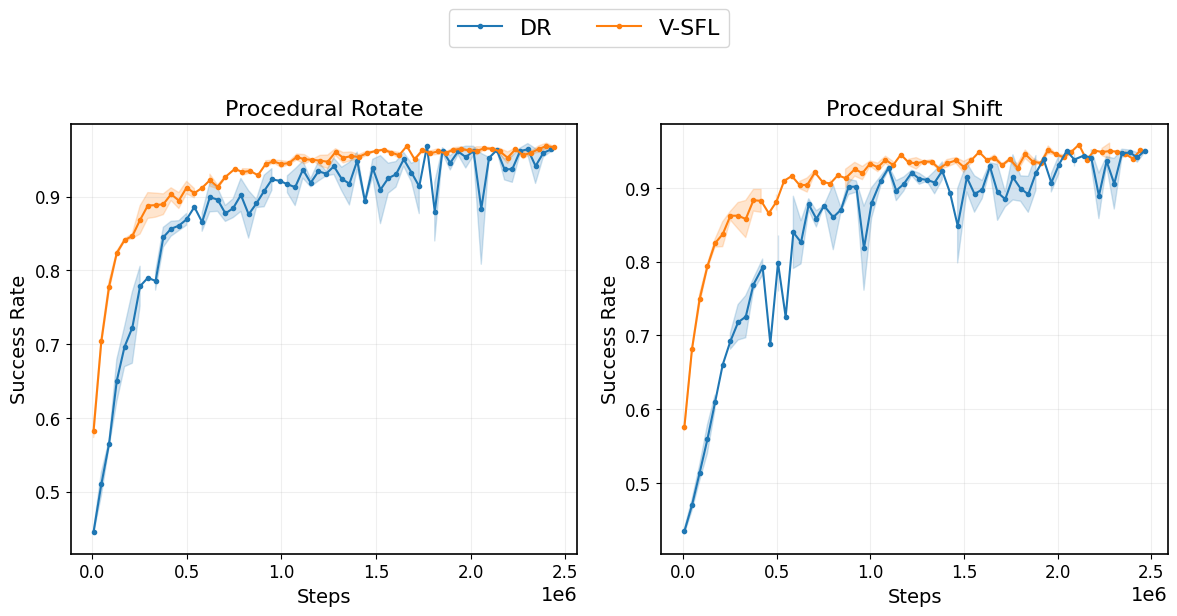

In [10]:

# algorithms = ['Iphyre-DR', 'Iphyre-V-Uniform', 
#                'Iphyre-Robust-PLR', 'Iphyre-V-Robust-PLR', 
#                'Iphyre-Accel', 'Iphyre-V-Accel',
#                'Iphyre-V-SFL', ]
import matplotlib.pyplot as plt

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']



method_display_config_rotate = {
    'Iphyre-ProceduralRotate-on-DR': {
        'color': default_colors[0],
        'marker': 'o',
        'markersize': 3,
        'label': 'DR',
    },
    'Iphyre-ProceduralRotate-on-V-SFL': {
        'color': default_colors[1],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-SFL',
    },
}
methods_to_plot_rotate = method_display_config_rotate.keys()


method_display_config_shift = {
    'Iphyre-ProceduralShift-on-DR': {
        'color': default_colors[0],
        'marker': 'o',
        'markersize': 3,
        'label': 'DR',
    },
    'Iphyre-ProceduralShift-on-V-SFL': {
        'color': default_colors[1],
        'marker': 'o',
        'markersize': 3,
        'label': 'V-SFL',
    },
}
methods_to_plot_shift = method_display_config_shift.keys()

chart_metrics = [
    ("Iphyre-ProceduralRotate-v0/mean_success_rate", "Procedural Rotate"),
    ("Iphyre-ProceduralShift-v0/mean_success_rate", "Procedural Shift"),
]

filename = 'exp3-multitask.png'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure with gridspec
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1])
# Create axes
ax1 = plt.subplot(gs[0, 0:3])  # Span first three columns in top row
ax2 = plt.subplot(gs[0, 3:6])  # Span last three columns in top row

plt.rcParams.update({'font.size': 14})  # Increase overall font size

gap = 5
end = 300

for method, df in method_dfs[chart_metrics[0][0]].items():
    if method in methods_to_plot_rotate:
        # Sample every 5th datapoint
        sampled_df = df.iloc[:end:gap]
        mean = sampled_df[(chart_metrics[0][0], 'mean')]
        stderr = sampled_df[(chart_metrics[0][0], 'stderr')]
        ax1.plot(sampled_df.index, mean, label=method_display_config_rotate[method]['label'], marker='o', markersize=3, color=method_display_config_rotate[method]['color'])
        ax1.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config_rotate[method]['color'])
ax1.set_xlabel('Steps', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.set_title(chart_metrics[0][1], fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='-', alpha=0.2)
# ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)
for spine in ax1.spines.values():
    spine.set_linewidth(1.2)

# Plot shift data (test3)
for method, df in method_dfs[chart_metrics[1][0]].items():
    if method in methods_to_plot_shift:
        sampled_df = df.iloc[:end:gap]
        mean = sampled_df[(chart_metrics[1][0], 'mean')]
        stderr = sampled_df[(chart_metrics[1][0], 'stderr')]
        ax2.plot(sampled_df.index, mean, label=method_display_config_shift[method]['label'], marker='o', markersize=3, color=method_display_config_shift[method]['color'])
        ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config_shift[method]['color'])
ax2.set_xlabel('Steps', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.set_title(chart_metrics[1][1], fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='-', alpha=0.2)
# ax2.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)

for spine in ax2.spines.values():
    spine.set_linewidth(1.2)



# Add legend at the top of the figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)

plt.tight_layout()
if filename:
    plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()
